In [228]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import seaborn as sns
# from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')



In [229]:
mentalHealth = pd.read_csv("Mental health Depression disorder Data.csv")
mentalHealth = mentalHealth.iloc[:6468]

countries = pd.read_csv("continents2.csv")
countries = countries.rename(columns={"alpha-3": "Code"})
countries

,name,alpha-2,Code,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,NaN,9.0,61.0,NaN
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


In [230]:
mental = pd.merge(mentalHealth, countries, on='Code')
mental

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),...,name,alpha-2,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,...,Afghanistan,AF,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,...,Afghanistan,AF,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,...,Afghanistan,AF,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,...,Afghanistan,AF,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,...,Afghanistan,AF,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,6463,Zimbabwe,ZWE,2013,0.15567,0.607993,0.117248,3.090168,0.766280,3.128192,...,Zimbabwe,ZW,716,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0
5456,6464,Zimbabwe,ZWE,2014,0.155993,0.60861,0.118073,3.093964,0.768914,3.140290,...,Zimbabwe,ZW,716,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0
5457,6465,Zimbabwe,ZWE,2015,0.156465,0.609363,0.11947,3.098687,0.771802,3.155710,...,Zimbabwe,ZW,716,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0
5458,6466,Zimbabwe,ZWE,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,...,Zimbabwe,ZW,716,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


In [231]:
mental = mental.rename(columns={"Schizophrenia (%)" : "Schizophrenia", "Bipolar disorder (%)": "Bipolar", "Eating disorders (%)" : "Eating Disorder", "Anxiety disorders (%)": "Anxiety", "Drug use disorders (%)": "Drug Use", "Depression (%)": "Depression", "Alcohol use disorders (%)": "Alcoholism"})
mental['Schizophrenia'] = pd.to_numeric(mental['Schizophrenia'], errors='coerce')
mental['Bipolar'] = pd.to_numeric(mental['Bipolar'], errors='coerce')
mental['Eating Disorder'] = pd.to_numeric(mental['Eating Disorder'], errors='coerce')
mental['Year'] = pd.to_numeric(mental['Year'], errors='coerce')
percentage_columns = ['Schizophrenia', 'Bipolar', 'Eating Disorder', 'Anxiety', 'Drug Use', 'Depression', 'Alcoholism']

for column in percentage_columns:
    mask = mental[column] > 100
    num_digits = np.floor(np.log10(mental.loc[mask, column])).astype(int) + 1
    mental.loc[mask, column] = mental.loc[mask, column] / 10 ** num_digits



### Prevalence rates of different disorders globally

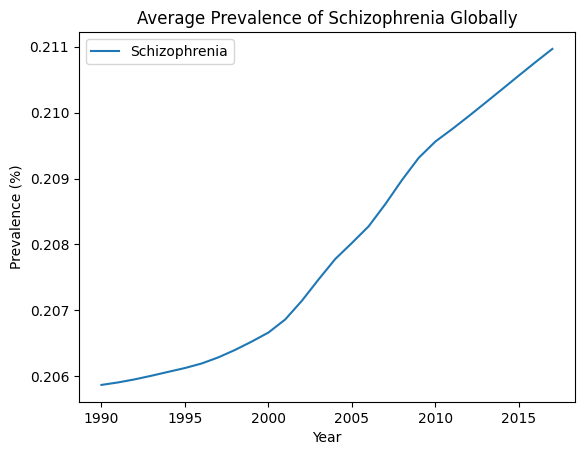

In [232]:
average_prevalence = mental.groupby('Year').mean()

plt.plot(average_prevalence.index, average_prevalence['Schizophrenia'], label='Schizophrenia')

plt.xlabel('Year')
plt.ylabel('Prevalence (%)')
plt.title('Average Prevalence of Schizophrenia Globally')
plt.legend()
plt.show()

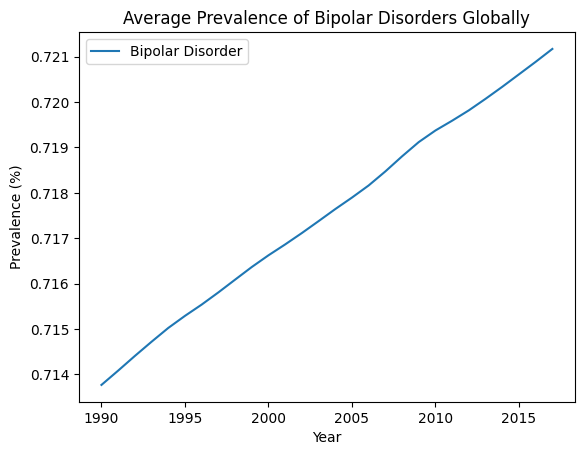

In [233]:
plt.plot(average_prevalence.index, average_prevalence['Bipolar'], label='Bipolar Disorder')
plt.xlabel('Year')
plt.ylabel('Prevalence (%)')
plt.title('Average Prevalence of Bipolar Disorders Globally')
plt.legend()
plt.show()

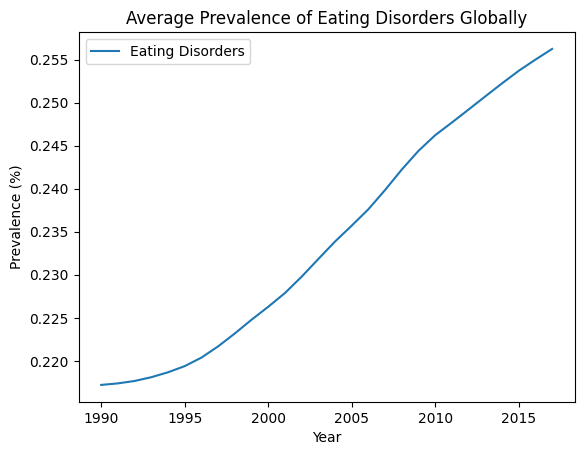

In [234]:
plt.plot(average_prevalence.index, average_prevalence['Eating Disorder'], label='Eating Disorders')
plt.xlabel('Year')
plt.ylabel('Prevalence (%)')
plt.title('Average Prevalence of Eating Disorders Globally')
plt.legend()
plt.show()

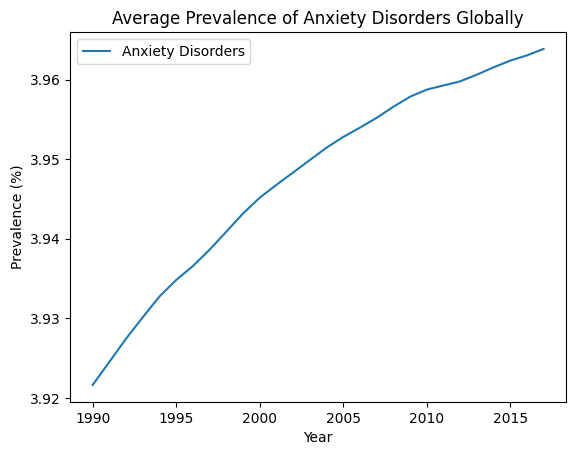

In [235]:
plt.plot(average_prevalence.index, average_prevalence['Anxiety'], label='Anxiety Disorders')
plt.xlabel('Year')
plt.ylabel('Prevalence (%)')
plt.title('Average Prevalence of Anxiety Disorders Globally')
plt.legend()
plt.show()

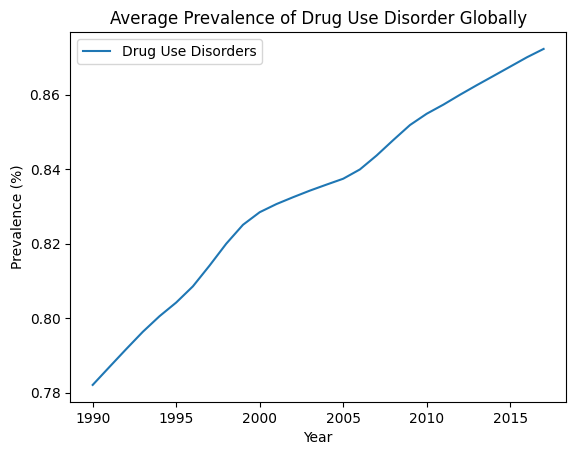

In [236]:

plt.plot(average_prevalence.index, average_prevalence['Drug Use'], label='Drug Use Disorders')
plt.xlabel('Year')
plt.ylabel('Prevalence (%)')
plt.title('Average Prevalence of Drug Use Disorder Globally')
plt.legend()
plt.show()

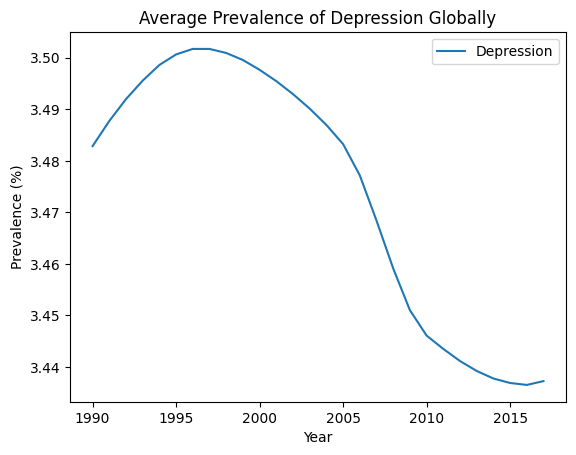

In [237]:
plt.plot(average_prevalence.index, average_prevalence['Depression'], label='Depression')
plt.xlabel('Year')
plt.ylabel('Prevalence (%)')
plt.title('Average Prevalence of Depression Globally')
plt.legend()
plt.show()

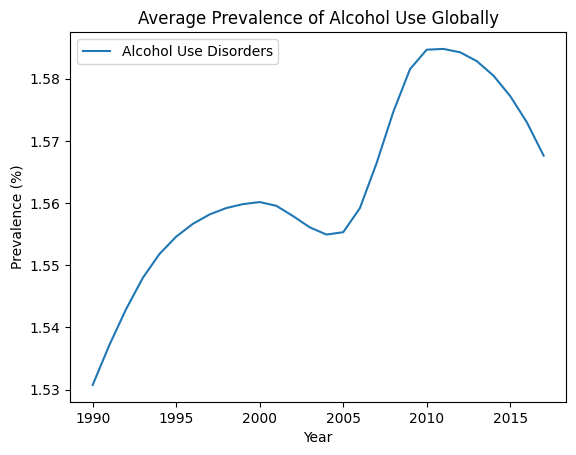

In [238]:

plt.plot(average_prevalence.index, average_prevalence['Alcoholism'], label='Alcohol Use Disorders')
plt.xlabel('Year')
plt.ylabel('Prevalence (%)')
plt.title('Average Prevalence of Alcohol Use Globally')
plt.legend()
plt.show()

## Top 5 Sub Regions per Disorder

In [240]:
def plot_top_subregions(disorder_name):

    grouped_data = mental.groupby("sub-region").agg({"Schizophrenia": "mean", 
                                                 "Bipolar": "mean", 
                                                 "Eating Disorder": "mean",
                                                 "Anxiety": "mean",
                                                 "Drug Use": "mean",
                                                 "Depression": "mean",
                                                 "Alcoholism": "mean"
                                                 }).reset_index()
    sorted_data = grouped_data.sort_values(by=disorder_name, ascending=False)
    top_subregions = sorted_data["sub-region"].head(5)
    mean_values = sorted_data[disorder_name].head(5)

    fig, ax = plt.subplots(figsize=(10, 6))
    x_pos = range(len(mean_values))
    ax.bar(x_pos, mean_values)
    ax.set_ylabel("Mean Value")
    ax.set_title(f"Top 5 Subregions - {disorder_name}")
    ax.set_xticks(x_pos)
    ax.set_xticklabels(top_subregions)

    plt.tight_layout()
    plt.show()

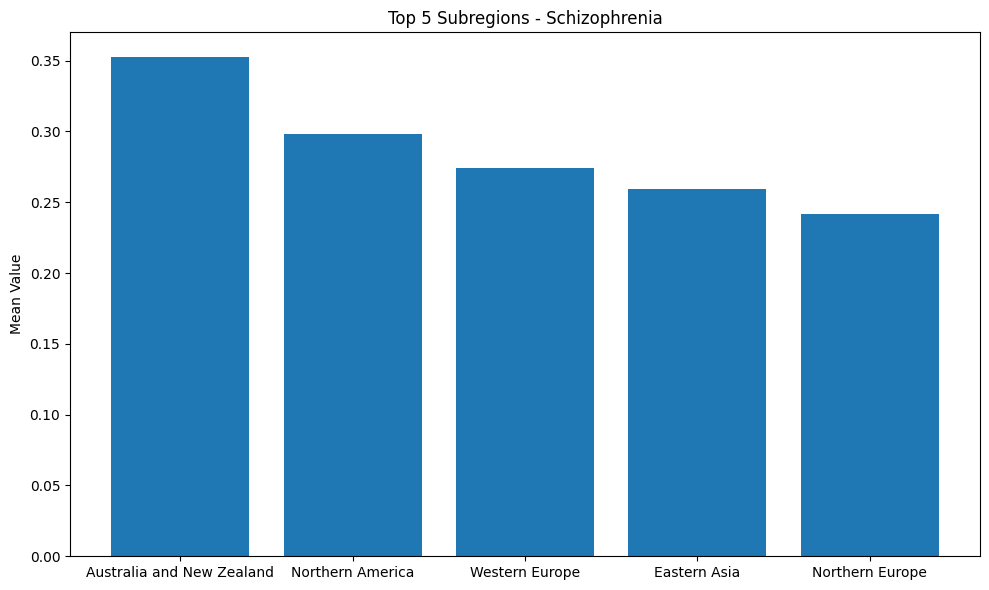

In [241]:
plot_top_subregions("Schizophrenia")

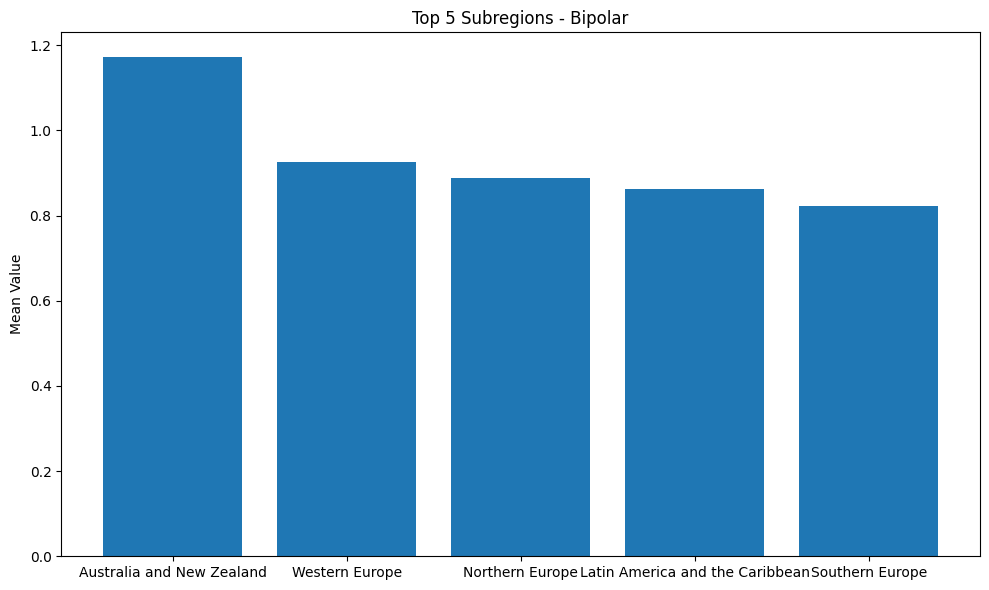

In [242]:
plot_top_subregions("Bipolar")

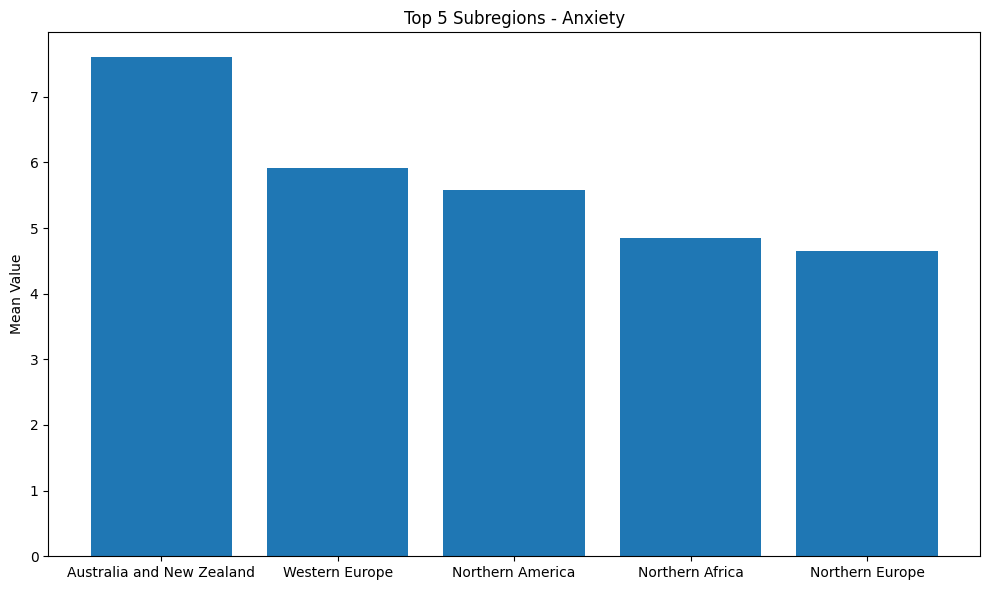

In [243]:
plot_top_subregions("Anxiety")

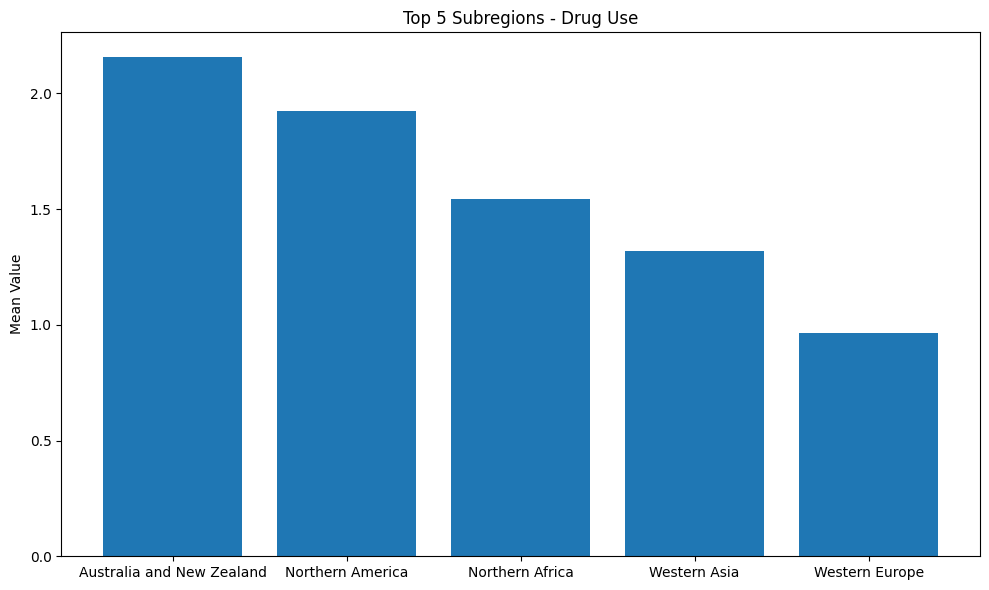

In [244]:
plot_top_subregions("Drug Use")

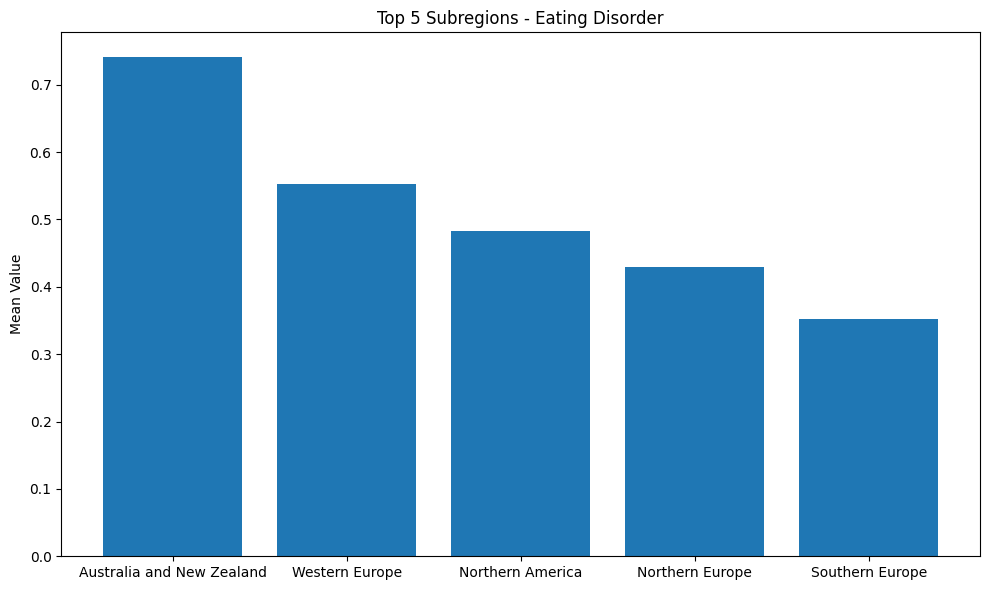

In [245]:
plot_top_subregions("Eating Disorder")

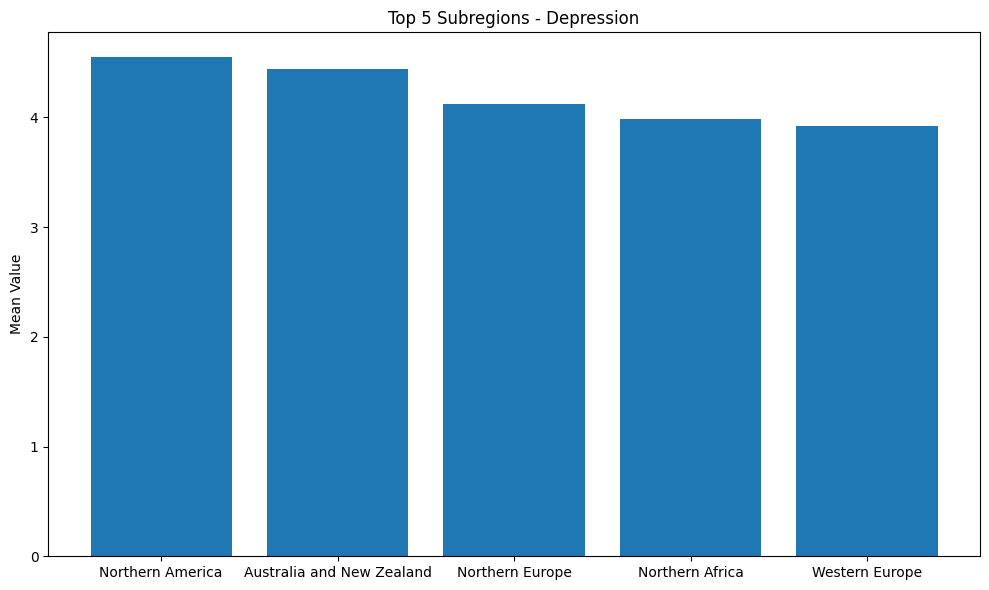

In [246]:
plot_top_subregions("Depression")

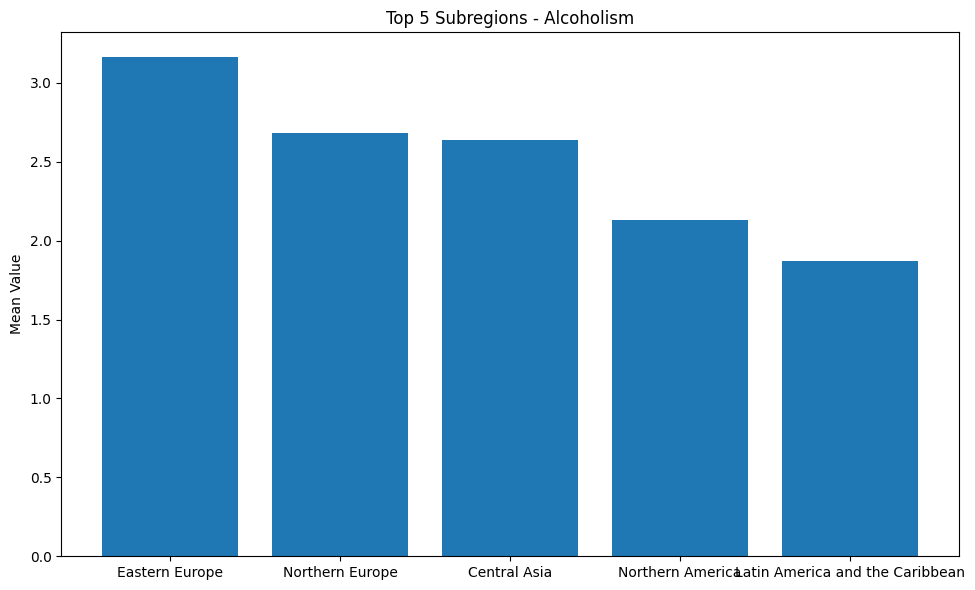

In [247]:
plot_top_subregions("Alcoholism")

## Predict Mental Health Disorder Trends for a Given Country
Linear regression for years x - y

In [248]:
def mentalHealthPredictor(target_country, target_disorder, from_when, to_when):

  # filtered_data = mental.loc[mental["Entity"] == target_country, ["Year", target_disorder]].copy()
  filtered_data = mental.loc[(mental["Entity"] == target_country) & (~mental[target_disorder].isnull()),
                                ["Year", target_disorder]].copy()
  X = filtered_data["Year"].values.reshape(-1, 1)  
  y = filtered_data[target_disorder]
  linear_regression = LinearRegression()
  linear_regression.fit(X, y)
  future_years = range(from_when, to_when)  
  future_X = pd.DataFrame(future_years, columns=["Year"])
  future_predictions = linear_regression.predict(future_X)

  plt.scatter(filtered_data["Year"], filtered_data[target_disorder], color='blue', label='Historical Data')
  plt.plot(future_years, future_predictions, color='red', label='Predicted Trend')
  plt.xlabel('Year')
  plt.ylabel("Percentage of " + target_disorder)
  plt.title( "" + target_disorder + " Trend in " + target_country )
  plt.legend()
  plt.show()


Predicting Eating Disorder from 2020 to 2050 in Taiwan:

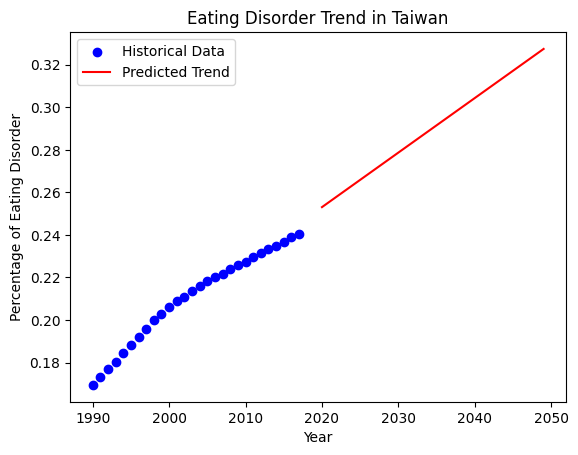

In [250]:
mentalHealthPredictor("Taiwan", "Eating Disorder", 2020, 2050)

Predicting Anxiety disorder from 2020 to 2030 in Uraguay:

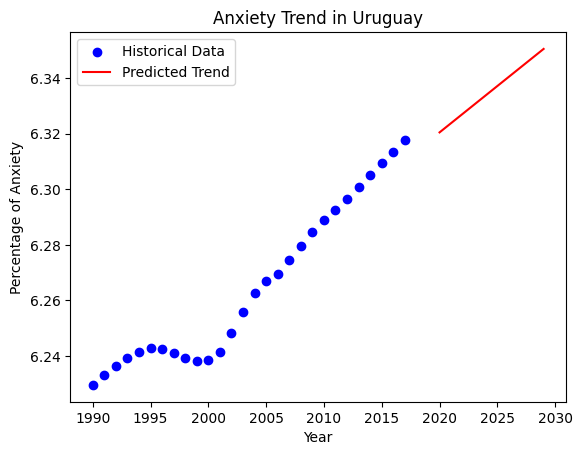

In [251]:
mentalHealthPredictor("Uruguay", "Anxiety", 2020, 2030)

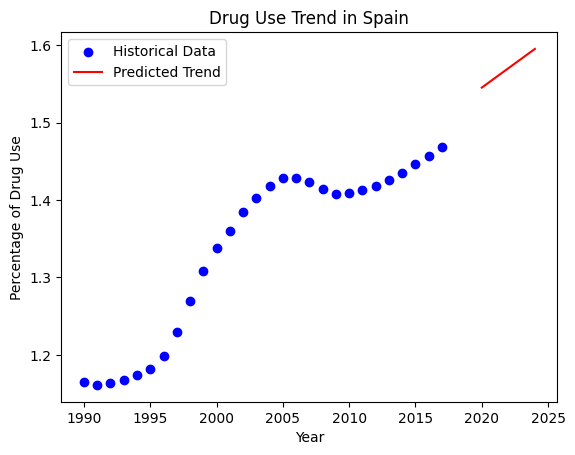

In [252]:
mentalHealthPredictor("Spain", "Drug Use", 2020, 2025)

## Display top n countires with highest predicted increase in a given disorder

Linear Regression model + Feature Engineering

In [254]:
def percent_change_predictor(target_country, target_disorder):
    filtered_data = mental.loc[(mental["Entity"] == target_country) & (~mental[target_disorder].isnull()),
                               ["Year", target_disorder]].copy()
    X = filtered_data["Year"].values.reshape(-1, 1)
    y = filtered_data[target_disorder]
    linear_regression = LinearRegression()
    linear_regression.fit(X, y)

    future_years = range(2024, 2026)
    future_X = pd.DataFrame(future_years, columns=["Year"])
    future_predictions = linear_regression.predict(future_X)

    pct_change_per_year = (future_predictions[-1] - future_predictions[0]) / future_predictions[0] * 100 

    return pct_change_per_year



In [255]:
def get_top_countries_with_highest_percent_change(disorder_name, n):
    country_percent_change = {}
    countries = mental["Entity"].unique()
    for country in countries:
        percent_change = percent_change_predictor(country, disorder_name)
        country_percent_change[country] = percent_change
    df = pd.DataFrame.from_dict(country_percent_change, orient="index", columns=["PercentChange"])
    df = df.sort_values(by="PercentChange", ascending=False)

    top_countries = df.head(n)

    return top_countries

In [256]:
get_top_countries_with_highest_percent_change("Schizophrenia", 5)

,PercentChange
Equatorial Guinea,0.716820
Myanmar,0.454037
Maldives,0.380717
Laos,0.349308
Malaysia,0.345127


In [257]:
get_top_countries_with_highest_percent_change("Drug Use", 10)

,PercentChange
Afghanistan,1.428612
Libya,1.241115
United Arab Emirates,1.196421
Lebanon,1.057106
Chile,1.056258
United States,1.045779
Tunisia,0.980588
Estonia,0.973190
Sweden,0.918665
Malta,0.900683


In [258]:
get_top_countries_with_highest_percent_change("Alcoholism", 2)

,PercentChange
Mongolia,1.539814
Kazakhstan,1.292013


In [261]:
get_top_countries_with_highest_percent_change("Eating Disorder", 3)

,PercentChange
Equatorial Guinea,2.359828
China,1.608519
Bosnia and Herzegovina,1.589594


## Heatmap to discover correlations between different disorders

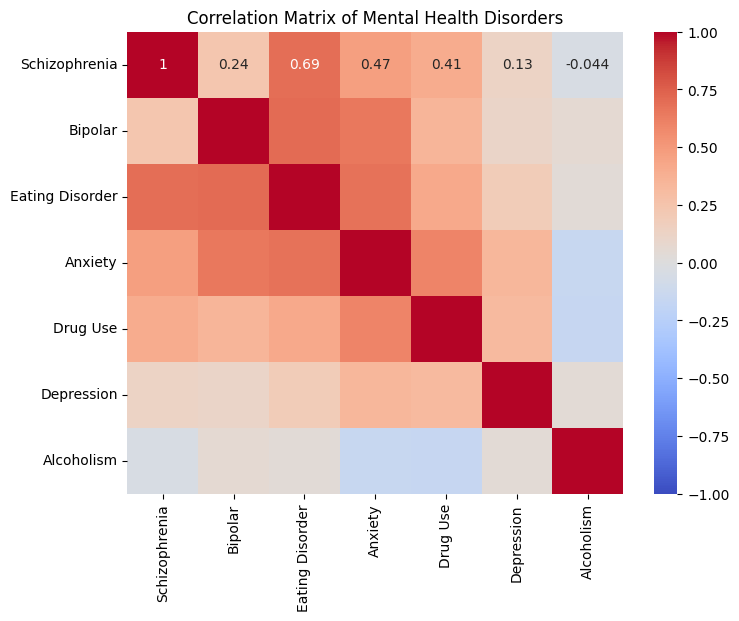

In [262]:
disorder_columns = ['Schizophrenia', 'Bipolar', 'Eating Disorder', 'Anxiety', 'Drug Use', 'Depression', 'Alcoholism']
filtered_data = mental[disorder_columns]
correlation_matrix = filtered_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Mental Health Disorders')
plt.show()

In [263]:
disasters = pd.read_csv("1970-2021_DISASTERS.xlsx - emdat data.csv")
disasters = disasters[disasters["Year"] > 1989]


Model for Schizophrenia: MSE = 0.00
Model for Bipolar: MSE = 0.02
Model for Eating Disorder: MSE = 0.03
Model for Anxiety: MSE = 1.32
Model for Drug Use: MSE = 0.16
Model for Depression: MSE = 0.41
Model for Alcoholism: MSE = 0.58
Feature Importances for Schizophrenia:
  Number of Disasters: 0.41
  Total Affected: 0.29
  Total Deaths: 0.30

Feature Importances for Bipolar:
  Number of Disasters: 0.27
  Total Affected: 0.26
  Total Deaths: 0.47

Feature Importances for Eating Disorder:
  Number of Disasters: 0.34
  Total Affected: 0.34
  Total Deaths: 0.32

Feature Importances for Anxiety:
  Number of Disasters: 0.33
  Total Affected: 0.33
  Total Deaths: 0.34

Feature Importances for Drug Use:
  Number of Disasters: 0.33
  Total Affected: 0.32
  Total Deaths: 0.35

Feature Importances for Depression:
  Number of Disasters: 0.32
  Total Affected: 0.31
  Total Deaths: 0.37

Feature Importances for Alcoholism:
  Number of Disasters: 0.31
  Total Affected: 0.33
  Total Deaths: 0.35



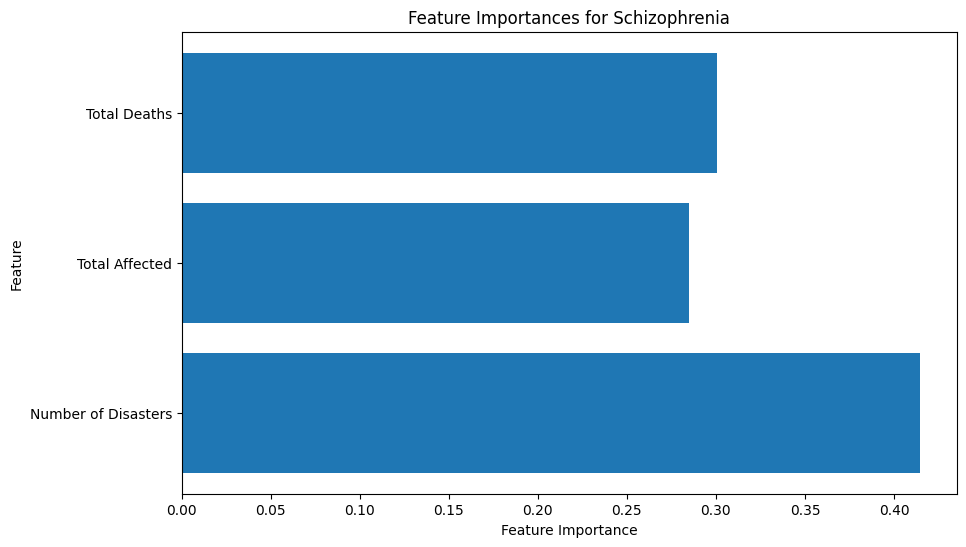

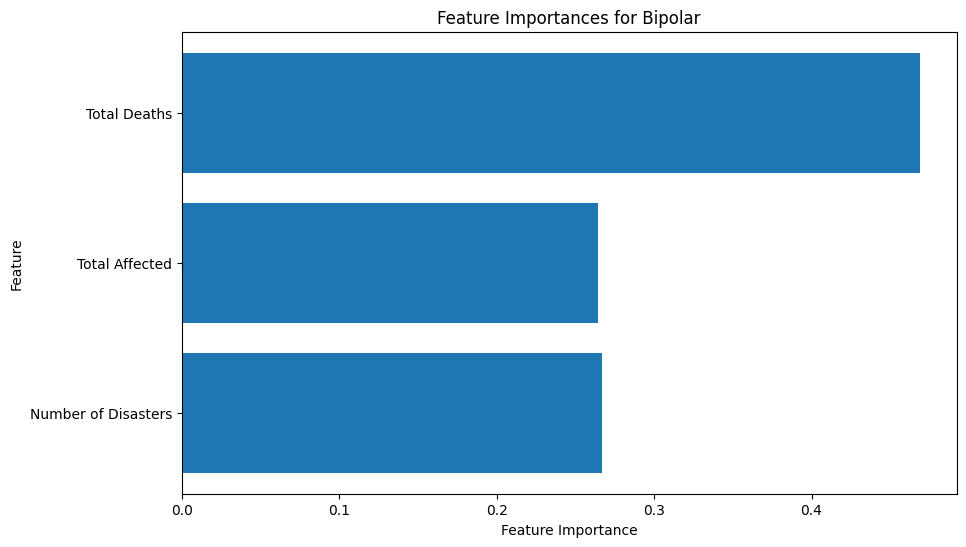

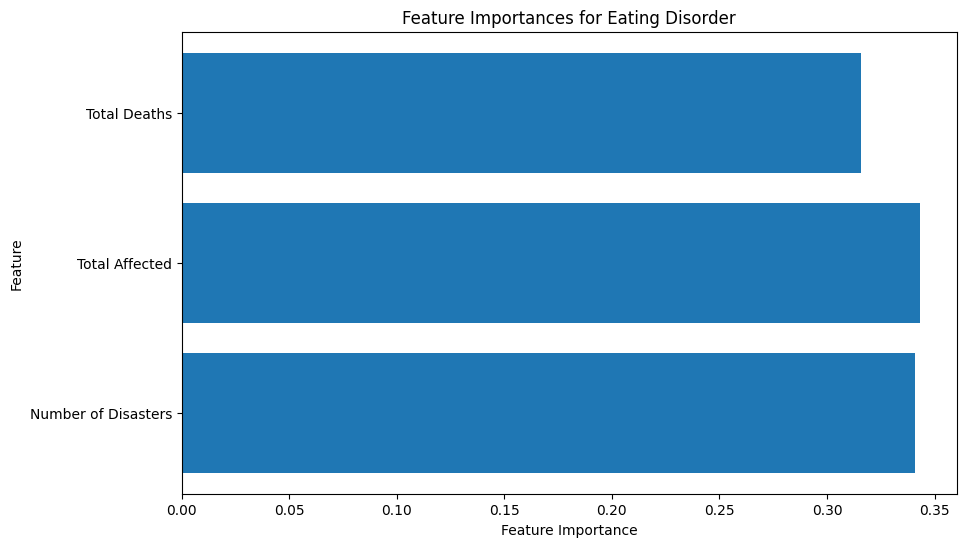

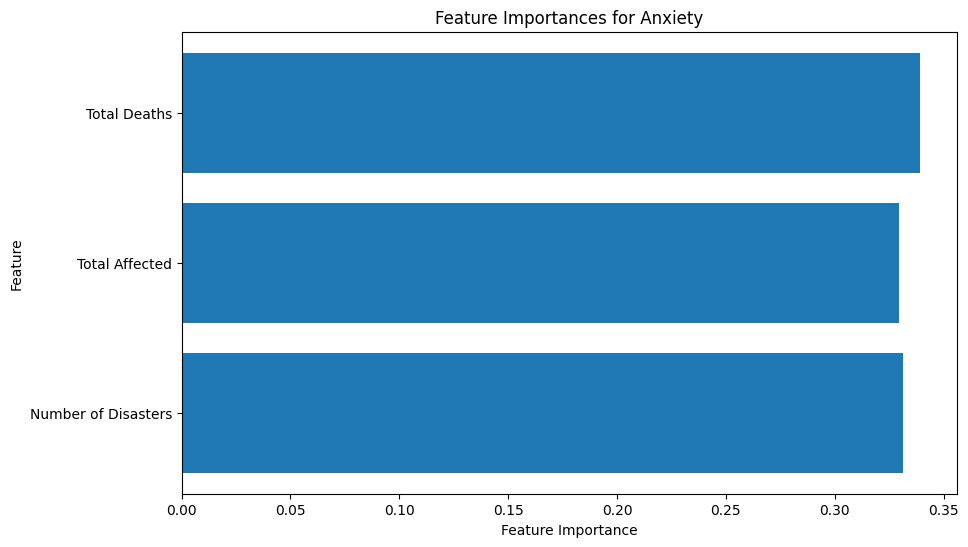

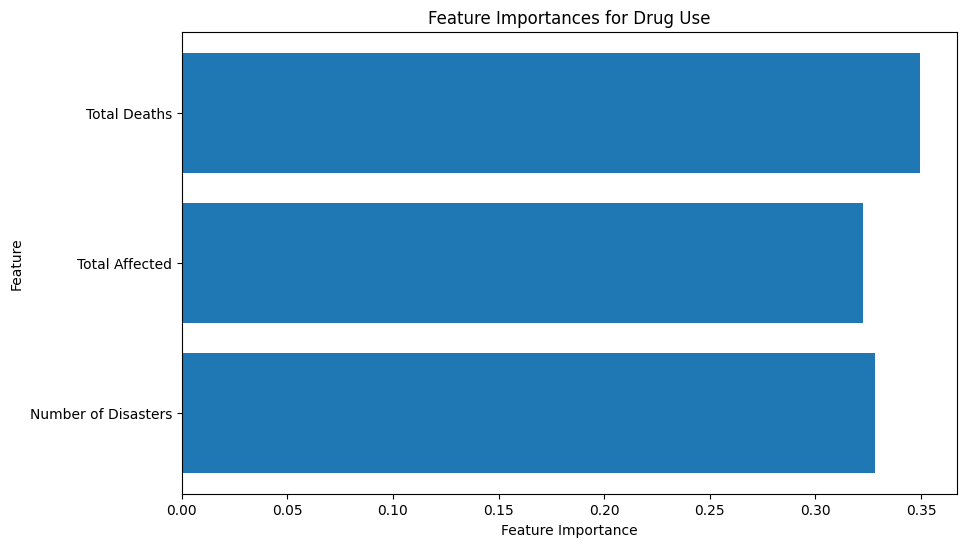

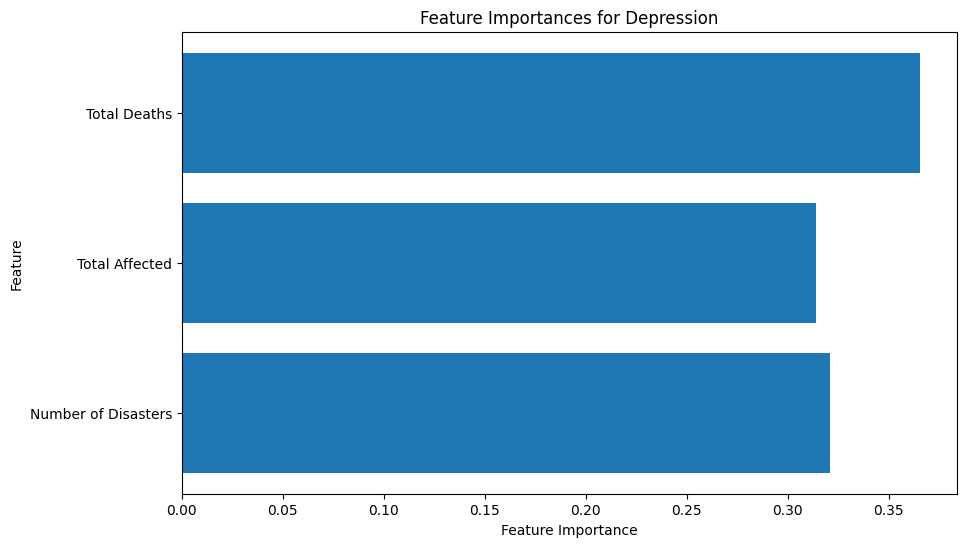

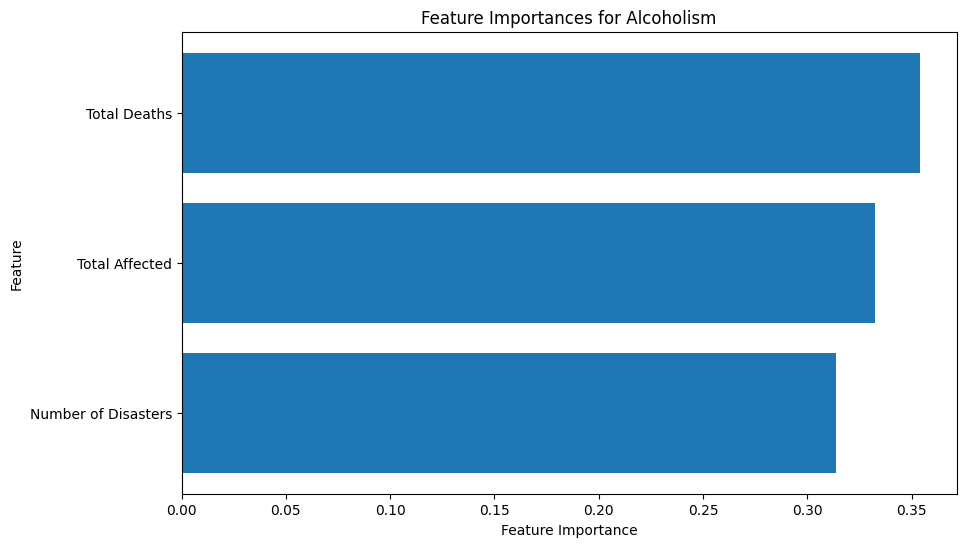

In [264]:
disasters_agg_df = disasters.groupby(['Country', 'Year']).agg({
    'Disaster Type': 'count', 'Total Affected': 'count', 
    'Total Deaths': 'count'}).reset_index()

disasters_agg_df.columns = ['Entity', 'Year', 'Number of Disasters', 'Total Affected', 'Total Deaths']
merged_df = pd.merge(mental, disasters_agg_df, on=['Entity', 'Year'])
y_vars = ["Schizophrenia", 
                                                 "Bipolar", 
                                                 "Eating Disorder",
                                                 "Anxiety",
                                                 "Drug Use",
                                                 "Depression",
                                                 "Alcoholism"]

x_vars = ['Number of Disasters', 'Total Affected', 'Total Deaths']
models = {}
for y_var in y_vars:
    X_train, X_test, y_train, y_test = train_test_split(merged_df[x_vars], merged_df[y_var], test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    models[y_var] = {'model': model, 'feature_importances': model.feature_importances_}
    y_pred = model.predict(X_test)
    mse = np.mean((y_pred - y_test) ** 2)
    print(f"Model for {y_var}: MSE = {mse:.2f}")

for y_var, model_info in models.items():
    print(f"Feature Importances for {y_var}:")
    for i, x_var in enumerate(x_vars):
        print(f"  {x_var}: {model_info['feature_importances'][i]:.2f}")
    print()

for y_var, model_info in models.items():
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(x_vars)), model_info['feature_importances'])
    plt.yticks(range(len(x_vars)), x_vars)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(f"Feature Importances for {y_var}")
    plt.show()